In [1]:
import sys
import PIL
import numpy as np
import tensorflow as tf
import config
import os
from matplotlib import pyplot as plt
import my_tools

In [11]:
img_size = config.CNN_IN_HEIGHT
src_dir = config.PIC_SRC_DIR
dst_dir = config.DATA_DIR
src_labels = config.LABEL_ORG

In [12]:
def to_int_convert(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def to_bytes_convert(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [13]:
def get_image_with_label(n, labels):
    label = labels[n]
    img_name = str(n)+".png"
    path_to_file = os.path.join(src_dir,img_name)
    print(img_name)
    print(path_to_file)
    img = PIL.Image.open(path_to_file)
    return img,label

In [14]:
def createTFRecord(file_name, index, labels):
    writer = tf.python_io.TFRecordWriter(file_name)
    for i in range(len(index)):
        img, label = get_image_with_label(index[i],labels)
        
        
        
        feature = {"image" : to_bytes_convert(img.tobytes()),
                   "class" : to_int_convert(label[0]),
                   "x1" : to_int_convert(label[1]),
                   "y1" : to_int_convert(label[2]),
                   "x2" : to_int_convert(label[3]),
                   "y2" : to_int_convert(label[4]),
                          
                  }
        
        example = tf.train.Example(features=tf.train.Feature(feature=feature))
        writer.write(example.SerializeToString())
        
    writer.close()
    sys.stdout.flush()
        
        

In [15]:
def main(src_dir, dst_dir, src_labels, force = False):
    labels = np.load(src_labels)
    files = os.listdir(src_dir)
    if len(files) == labels.shape[0]:
        print("Same ammount of labels and files")
    names = ['train.tfrecords','test.tfrecords','validation.tfrecords']
    if force == True:
        for n in range(0,3):
            to_rm = os.path.join(config.DATA_DIR, names[n])
            if os.path.exists(to_rm):   os.remove(to_rm)
                
    index = np.random.permutation(labels.shape[0])
    train_index = index[0:int(0.6*len(index))]
    test_index = index[int(0.6*len(index)):int(0.8*len(index))]
    val_index = index[int(0.8*len(index)):]
    createTFRecord(names[0], train_index, labels)
    print("created train record")
    createTFRecord(names[1], test_index, labels)
    print("created test record")
    createTFRecord(names[2], val_index, labels)
    print("created val record")

In [16]:
if __name__ == '__main__' :
    main(src_dir, dst_dir, src_labels, force = True)

Same ammount of labels and files
308.png
data\pictures\308.png


TypeError: 1.0 has type numpy.float64, but expected one of: int, long

In [5]:
img , label = my_tools.get_image_with_label(1)
print(label.shape)

(6,)


[  1.           0.          32.82730255 -23.86228299   1.20016102
   2.        ]


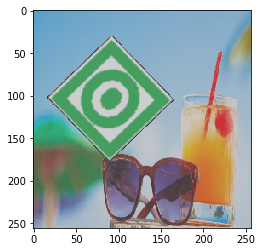

In [2]:
my_tools.show_image(1)